# Diffusivity Package

In the following code cells, the newly developed diffusivity package will be tested.

In [2]:
from PyQt5.QtWidgets import QFileDialog
import json as js
import numpy as np
import pandas as pd
from pathlib import Path, PureWindowsPath
from scipy import io
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erf
from scipy.constants import elementary_charge, Boltzmann
import matplotlib as mpl
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

import os
from bisect import bisect_left, bisect_right
import re
import itertools


from diffusivity import DiffusivityMeasurement

/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:416: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if shape[0] is 2:
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:418: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif shape[1] is 2:
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:432: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.fit_function_type is "richards":
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:435: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif self.fit_function_type is "gauss_cdf":
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:519: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.fit_function_type is 'richards':
/home/stefa

### Testing the difusivity package

searching a file

In [24]:
%gui qt5
default_path = Path(os.getcwd()).parents[2]/Path('Data/Diffusivity/Diffusivity sweeps')
#default_path = '/home/stefan/'
#default_path = '\\\\file\\e24\\Projects\\FinleyLab\\_IQPGroup\\_SSPDs\\Data\\Diffusivity\\Data_measured\\Diffusivity sweeps'
#default_path = '\\\\192.168.110.28\\FinleyLab\\FinleyLab\\_IQPGroup\\_SSPDs\\Data\\Diffusivity\\Data_measured\\Diffusivity sweeps'
#default_path = '192.168.110.28/E24StorageFile/FinleyLab/_IQPGroup/_SSPDs/Data/Diffusivity/Data_measured/Diffusivity sweeps'
#default_path = '\\192.168.110.28/E24StorageFile/FinleyLab/_IQPGroup/_SSPDs/Data/Diffusivity/Data_measured/Diffusivity sweeps/200722_S1_CL2_diffusweep_200727-001.json'

#filename = PureWindowsPath(default_path)
#print(filename)
print(default_path)
filename_probe = QFileDialog.getOpenFileName(None, 'Import file', str(default_path),"JSON/MAT files (*.json *.txt *.mat)")
#filename_probe = QFileDialog.getOpenFileName(self, 'Import file', str(default_path),"JSON/MAT files (*.json *.txt *.mat)")
print(filename_probe[0])
file_to_import = filename_probe[0]

/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps
/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_2007272nd_meas.json


In [44]:
filename_probe = QFileDialog.getOpenFileName(None, 'Import file', str(filename),"JSON/MAT files (*.json *.txt *.mat)")
print(filename_probe[0])
file_to_import = filename_probe[0]

In [34]:

filename_probe = QFileDialog.getOpenFileName(None, 'Import file', str(filename),"JSON/MAT files (*.json *.txt *.mat)",options=QFileDialog.DontUseNativeDialog)
#filename_probe = QFileDialog.getOpenFileName(None, 'Import file', str(default_path),"JSON/MAT files (*.json *.txt *.mat)")

In [19]:
default_path = PureWindowsPath('\\\\192.168.110.28\\FinleyLab\\FinleyLab\\_IQPGroup\\_SSPDs\\Data\\Diffusivity\\Data_measured\\Diffusivity sweeps\\200722_S1_CL2_diffusweep_200727-001.json')
default_path = Path('\\\\192.168.110.28\\FinleyLab\\FinleyLab\\_IQPGroup\\_SSPDs\\Data\\Diffusivity\\Data_measured\\Diffusivity sweeps\\200722_S1_CL2_diffusweep_200727-001.json')
#default_path = Path('smb://WSI%5Cstefan.strohauer%40wsi.tum.de@192.168.110.28/E24StorageFile/FinleyLab/_IQPGroup/_SSPDs/Data/Diffusivity/Data_measured/Diffusivity sweeps/200722_S1_CL2_diffusweep_200727-001.json')
file_to_import = default_path
print(str(str(file_to_import)))

\\192.168.110.28\FinleyLab\FinleyLab\_IQPGroup\_SSPDs\Data\Diffusivity\Data_measured\Diffusivity sweeps\200722_S1_CL2_diffusweep_200727-001.json


importing a mat file

In [53]:
T2=DiffusivityMeasurement(file_to_import)

NameError: name 'js' is not defined

importing a json file

In [25]:
T2=DiffusivityMeasurement(file_to_import)

defining the fit function type

In [5]:
T2.RTfit.fit_function_type = 'richards'
#T2.RTfit.fit_function_type = 'gauss_cdf'

Determination of diffusivity

In [26]:
T2.calc_RT_fits()
d_values = T2.calc_diffusivity()
print(d_values)
D, dBc2dT, B_0, err_D, err_dBc2dT, r_squared = d_values

print('D: ', D)
print('dBc2dT: ', dBc2dT)
print('B_0: ', B_0)
print('err_D: ', err_D)
print('err_dBc2dT: ', err_dBc2dT)
print('r_squared: ', r_squared)
print('\n')
print('Diffusivity', T2.diffusivity)
print('Err diffusivity', T2.diffusivity_err)
print('Film Tc: ', T2.Tc_0T)


/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.4890922963465786, -2.243324943263882, 15.336154055425133, 5.118948673871184e-07, 0.023479137433081613, 0.9884148161586337)
D:  0.4890922963465786
dBc2dT:  -2.243324943263882
B_0:  15.336154055425133
err_D:  5.118948673871184e-07
err_dBc2dT:  0.023479137433081613
r_squared:  0.9884148161586337


Diffusivity 0.4890922963465786
Err diffusivity 5.118948673871184e-07
Film Tc:  6.8363498125742295


get Bc2vsT

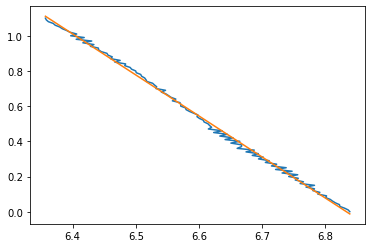

In [7]:
%matplotlib inline
T, Bc2 = T2.Bc2_vs_T()
plt.plot(T, Bc2)
T_fit, Bc2_fit = T2.get_Bc2vsT_fit()
plt.plot(T_fit, Bc2_fit)

get RvsT

(4, 9)

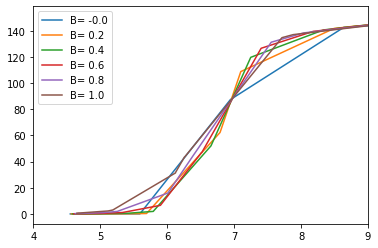

In [31]:
%matplotlib inline
# using default B
T, R = T2.R_vs_T()
for key, t, r in zip(T.keys(), T.values(), R.values()):
    plt.plot(t,r, label='B= '+ str(key))
plt.legend()
plt.xlim(4,9)

# B as scalar
# plt.plot(*T2.R_vs_T(B=0.1))

# B as list
# B=[1,2,3,4]
# T, R = T2.R_vs_T(B)
# for key, t, r in zip(T.keys(), T.values(), R.values()):
#     plt.plot(t,r, label='B= '+ str(key))
# plt.legend()

# Returning errors as well
# T, R, T_err, R_err = T2.R_vs_T(B=1, err=True)
# fig = plt.figure()
# ax=fig.add_subplot(111)
# ax.errorbar(T, R, yerr=R_err, xerr=T_err)

get R vs B

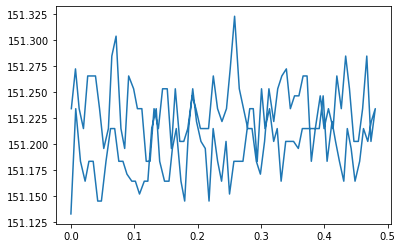

In [32]:
#print(T2.R_vs_B(9, err=True))
plt.plot(*T2.R_vs_B(10))

show how to get fit Parameters

In [33]:
# take into account that you get back all the fitted b fields, not only the ones you asked for, since the function only adds parameters to the parameters_RTfit attribute


# T2.parameters_RTfit={}
# # shows dict_param is updated continuously
# T2.fit_function_parameters(B=[1,2,3,4])
# print(T2.parameters_RTfit)
# T2.fit_function_parameters(B=[2.5,3.5])
# print(T2.parameters_RTfit)
# print(T2.fit_function_parameters(B=2.3))
# print(T2.parameters_RTfit)

# T2.parameters_RTfit={}
# print(T2.fit_function_parameters(B=[2.3,2.7]))
# print(T2.parameters_RTfit)

{'b': 5.0, 'm': 75.62642369020502, 'nu': 1.0, 'k': 151.25284738041003}


C:\Users\Noah.Ploch\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:789: RuntimeWarning: overflow encountered in true_divide
  pcov = np.dot(VT.T / s**2, VT)


show how to change starting values for fit parameters manually

In [ ]:
T2.parameters_RTfit={}
print(T2.fit_function_parameters(B=0.1))
print(T2.parameters_RTfit)
T2.RTfit.set_fit_parameters(b=5)
print(T2.fit_function_parameters(B=0.1))
print(T2.fit_function_parameters(B='all')) # to have fitting parameters for all B values again

get Tc: Transition temperature

In [40]:
print(T2.get_Tc())  # returns the Tc for the default array of B fields stored in the module
print(T2.get_Tc(B=1.1))
print(T2.get_Tc(err=True))  # returns Tc and the lower and upper error in Temperature for Tc
print(T2.get_Tc(B=1, err=True))

[6.80164454 6.8672006  6.82260844 6.76427284 6.68831944 6.66612887]
6.616170213687243
(array([6.80164454, 6.8672006 , 6.82260844, 6.76427284, 6.68831944,
       6.66612887]), array([0.50120829, 0.56676435, 0.52217219, 0.46383659, 0.38788319,
       0.36569262]), array([1.10512296, 1.0395669 , 1.08415906, 1.14249466, 1.21844806,
       1.24063863]))
(6.666128873742632, 0.365692623742632, 1.2406386262573674)


fitting R vs T sweeps

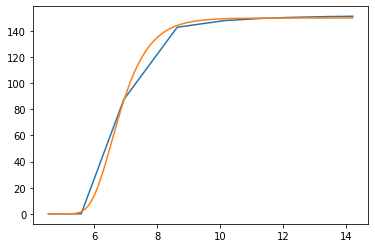

In [41]:
%matplotlib inline
plt.plot(*T2.R_vs_T(B=0), *T2.fit_function(B=0))

Example: RvsT plot with error

Plotting: Thesis style (necessary to perform latex)

In [18]:
def figsize(scale):
    fig_width_pt = 432.487                     # Get this from LaTeX using \showthe\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio
    # one plot
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    #fig_height = fig_width*golden_mean*1.3

    # splitted plots
    #fig_width = fig_width_pt*inches_per_pt*0.4    # width in inches
    #fig_height = fig_width*0.9
    fig_size = [fig_width,fig_height]
    return fig_size

# Use Latex Sans-Serif font and set other plot properties
params = {
    'text.usetex': True,
    #'text.usetex': False,
    'text.latex.unicode': True,
    'figure.figsize': figsize(0.8), # default figsize
    'axes.labelsize': 11, # LaTeX default is 10pt font. 11
    'axes.titlesize': 11,
    'font.size': 11,
    'legend.fontsize': 9, # Make the legend/label fonts a little smaller 9
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'text.latex.preamble': [
        r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
        r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
        r'\usepackage[version=4]{mhchem}',   # i need upright \micro symbols, but you need...
#        r'\usepackage{helvet}',   # if you want to use helvetica
#        r'\usepackage[helvet]{sfmath}' # if you want to use helvetica
        r'\usepackage{lmodern}',
        r'\renewcommand*\familydefault{\sfdefault}' # Only if the base font of the document is to be sans serif
        r'\usepackage{sfmath}'
        r'\newcommand{\dif}{\mathop{}\!\mathrm{d}}' # differential d
        ]
    ,
    'axes.linewidth': 1.0,
    #'lines.linewidth': 1.0,
    #'lines.markersize': 5.0,
    #'lines.markeredgewidth': 0.1,
    #'xtick.major.width': 1.0,
    #'ytick.major.width': 1.0,
    #'xtick.minor.width': 0.8,
    #'ytick.minor.width': 0.8,
    }
mpl.rcParams.update(params)

format_B_legend = '{:1.0f}'
format_B2_legend = '{:1.1f}'
format_D_legend = '{:1.3f}'
format_T_legend = '{:1.2f}'

# Use Latex Sans-Serif font
#plt.rcParams['text.latex.preamble'] = [
#       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
#       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#       r'\usepackage{helvet}',    # set the normal font here
#       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
#]
#plt.rc('text', usetex=True)
# Use non-Latex Sans-Serif font
#params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
#plt.rcParams.update(params)

C:\Users\Noah.Ploch\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:494: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


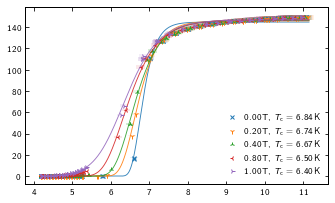

In [20]:
pdfname = './test_RvsT_plot' +'.pdf'
pdf = PdfPages(pdfname)

B=[0, 0.2, 0.4, 0.8, 1.0]
T, R, Terr, Rerr = T2.R_vs_T(B=B, err=True)  # returns the RT sweep from measurement data
T_fit, R_fit = T2.fit_function(B=B)

marker = itertools.cycle(('x', '1', '2', '3','4'))
markersize = ['4', '5', '5', '5', '5', '5']

fig = plt.figure()
ax=fig.add_subplot(111)
i = 0;
for key, t, r, tf, rf, terr, rerr in zip(T.keys(), T.values(), R.values(), T_fit.values(), R_fit.values(), Terr.values(), Rerr.values()):
    color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i]
    # Measured values
    ax.plot(t, r, next(marker), markersize=markersize[i], color=color, 
                label=r'$\SI{'+ '{:1.2f}'.format(abs(key)) + r'}{\tesla}$'+ r', $T_\text{c}=\SI{' +'{:1.2f}'.format(T2.get_Tc(B=key)) + r'}{\kelvin}$') #   
    # Error rectangles
    xy = (t[0]-terr[0], r[0]-rerr[0])
    width = 2*terr[0]
    height = 2*rerr[0]
    ax.add_patch(pat.Rectangle(xy, width, height, alpha=0.1, label = r'Error in ($T$,$R$)', linewidth=0.0, facecolor=color))
    for j, k, l, m in zip(t[1:], r[1:], terr[1:], rerr[1:]):
        xy = (j-l, k-m)
        width = 2*l
        height = 2*m
        ax.add_patch(pat.Rectangle(xy, width, height, alpha=0.1, linewidth=0.0, facecolor=color))
    # Fitted values
    ax.plot(tf, rf, '-', color=color, linewidth = 0.9, alpha=0.9)
    i = i+1;

# plt.xlabel(r'Temperature / $\si{\kelvin}$')
# plt.ylabel(r'Resistance / $\si{\ohm}$')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,4,5]
order = [0,1,2,3,4]
ax.tick_params(direction='in', bottom=True, top=True, left=True, right=True)
legend = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], handletextpad=0.1, markerscale=1, loc='best', handlelength=2.5, labelspacing=0.5, frameon=False, columnspacing=0.5)

#plot and save PDF
plt.tight_layout()
pdf.savefig(bbox_inches='tight')
pdf.close()

Testing the fit area limits

In [46]:
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

#changing fit area Bc2vsT
T2.calc_diffusivity(fit_low_lim=7, fit_upp_lim=8)
d_values=T2.get_Dfit_properties()
print(d_values)

(0.6318081011472605, -1.7365920854135404, 15.083871310545124, 1.915667468574908e-07, 0.0052654167589345135, 0.9962631634356204)
(0.6320200970877418, -1.7360095873662855, 15.079990965457917, 1.9288851784274937e-07, 0.005298190956440401, 0.9962141461627022)
(0.6318345880475809, -1.7365192863893437, 15.083386819689945, 1.9168775251304882e-07, 0.005268300999983711, 0.9962587712848283)
(0.631844704118941, -1.736491484062435, 15.083194344798237, 1.9168108943635406e-07, 0.005267949185807867, 0.9962591497375546)
(0.6317062196730558, -1.7368721626966888, 15.085693877548053, 1.9064103045450673e-07, 0.005241662794385933, 0.9962978687446974)
(0.655323985335244, -1.674275583536286, 14.666428922197973, 6.319566814891942e-08, 0.001614574874943268, 0.9998465807687579)


In [ ]:
# -- NOT IMPLEMENTED --
# reducing fit area RvsT

# T2.set_RT_fit_limits(6,9)
# T2.fit_function_parameters(B='all')
# T2.calc_diffusivity()
# d_values=T2.get_Dfit_properties()
# print(d_values)

# T2.set_RT_fit_limits(0,np.inf)
# T2.fit_function_parameters(B='all')
# T2.calc_diffusivity()
# d_values=T2.get_Dfit_properties()
# print(d_values)

# T2.set_RT_fit_limits(0,np.inf)
# T2.fit_function_parameters(B='all')
# T2.calc_diffusivity()
# d_values=T2.get_Dfit_properties()
# print(d_values)

# T2.parameters_RTfit={}
# B=0.5
# T2.fit_function_parameters(B)
# print(T2.parameters_RTfit)
# T2.set_RT_fit_limits(6,9)
# T2.fit_function_parameters(B)
# print(T2.parameters_RTfit)
# T2.fit_function_parameters(B)
# print(T2.parameters_RTfit)
# T2.set_RT_fit_limits(7,8)
# T2.fit_function_parameters(B)
# print(T2.parameters_RTfit)

# check why always the same values

In [44]:
%matplotlib widget

for t, T_sample, T_PCB in zip(T2.time_sweeps, T2.T_sample_sweeps,  T2.T_PCB_sweeps):
    #plt.plot(t, T_sample, t, T_PCB, color='b')
    plt.plot(t, T_sample, color='b')
    plt.plot(t, T_PCB, color='r')
    
plt.figure()
for t, T_sample, T_PCB in zip(T2.time_sweeps, T2.T_sample_sweeps,  T2.T_PCB_sweeps):
    #plt.plot(t, T_sample, t, T_PCB, color='b')
    plt.plot(t, np.array(T_sample)-np.array(T_PCB), color='b')
    #plt.plot(t, T_PCB, color='r')
    
# # using default B
# T, R = T2.R_vs_T('all')
# for key, t, r in zip(T.keys(), T.values(), R.values()):
#     plt.plot(t,r, label='B= '+ str(key))
# plt.legend()
# plt.xlim(4,9)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [84]:
%gui qt5
default_path = Path(os.getcwd()).parents[2]/Path('Data/Diffusivity/Diffusivity sweeps')
filename_probe = QFileDialog.getOpenFileNames(None, 'Import file', str(default_path),"JSON/MAT files (*.json *.txt *.mat)")
print(filename_probe)
print(filename_probe[0])
file_to_import = filename_probe[0]
all_files_to_import = file_to_import

%matplotlib widget
    
for file_to_import in all_files_to_import:
    print('Results for file ' + file_to_import)
    T2=DiffusivityMeasurement(file_to_import)
    T2.calc_RT_fits()
    d_values = T2.calc_diffusivity()
    print(d_values)
    D, dBc2dT, B_0, err_D, err_dBc2dT, r_squared = d_values
    
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    T, Bc2 = T2.Bc2_vs_T()
    plt.plot(T, Bc2,'x')
    T_fit, Bc2_fit = T2.get_Bc2vsT_fit()
    plt.plot(T_fit, Bc2_fit)
    ax.set_xlabel(r'Temperature / K')
    ax.set_ylabel(r'$B_{c2}$ / T')

    all_t = np.array([])
    all_T_sample = np.array([])
    all_T_PCB = np.array([])
    for t, T_sample, T_PCB in zip(T2.time_sweeps, T2.T_sample_sweeps,  T2.T_PCB_sweeps):
        all_t = np.append(all_t, t)
        all_T_sample = np.append(all_T_sample, T_sample)
        all_T_PCB = np.append(all_T_PCB, T_PCB)
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    #plt.plot(t, T_sample, t, T_PCB, color='b')
    plt.plot(all_t, all_T_sample, color='b', label='$T_{sample}$')
    plt.plot(all_t, all_T_PCB, color='r', label='$T_{PCB}$')
    ax.set_xlabel(r'Time / s')
    ax.set_ylabel(r'Temperature / K')
    plt.legend(loc="best")

    fig = plt.figure()
    ax  = fig.add_subplot(111)
    for t, T_sample, T_PCB in zip(T2.time_sweeps, T2.T_sample_sweeps,  T2.T_PCB_sweeps):
        #plt.plot(t, T_sample, t, T_PCB, color='b')
        plt.plot(t, np.array(T_sample)-np.array(T_PCB), color='b')
    ax.set_xlabel(r'Time / s')
    ax.set_ylabel(r'$T_{sample} - T_{PCB}$ / K')

(['/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728800nA.json', '/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728600nA.json', '/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728400nA.json', '/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_2007272nd_meas.json', '/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200727-001.json'], 'JSON/MAT files (*.json *.txt *.mat)')
['/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728800nA.json', '/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728600nA.json', '/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728400nA.json', '/home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_2007272nd_meas.json'

/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.46514784087540195, -2.3588047746015284, 16.612289692728215, 3.085636401291364e-07, 0.01564752802539612, 0.9953134728182186)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Results for file /home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728600nA.json


/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.45080343063470807, -2.4338611319077557, 16.77120346467444, 3.8158724227431423e-07, 0.020601670135822096, 0.9923918296906798)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Results for file /home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200728400nA.json


/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.31480090141630107, -3.485355165808541, 24.10586613435362, 1.2011689213013602e-06, 0.1329888283683797, 0.8652143303085759)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Results for file /home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_2007272nd_meas.json


/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.4890922963465786, -2.243324943263882, 15.336154055425133, 5.118948673871184e-07, 0.023479137433081613, 0.9884148161586337)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Results for file /home/stefan/Dropbox/PhD/Data/Diffusivity/Diffusivity sweeps/200722_S1_CL2_diffusweep_200727-001.json


/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
/home/stefan/Dropbox/PhD/Data evaluation and Simulations/Diffusivity/diffusivity-module/diffusivity.py:495: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.47154177929424457, -2.3268202227905572, 15.901789354468775, 2.450276636485666e-07, 0.01209087609954578, 0.9971191495304841)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Access file server via smb (not fully working yet)

In [13]:
import tempfile
import smb
import shutil

from smb.SMBConnection import SMBConnection

share_name          = "my_share"
user_name           = "stefan.strohauer@wsi.tum.de"
#user_name           = "WSI%5Cstefan.strohauer%40wsi.tum.de"
password            = "#######"             # secret :-)
local_machine_name  = "laptop"             # arbitrary
server_machine_name = "FILE"      # MUST match correctly
server_IP           = "192.168.110.28"        # as must this            

# create and establish connection
conn = SMBConnection(user_name, password, local_machine_name, server_machine_name, use_ntlm_v2 = True)

conn.connect(server_IP, 139)
#assert conn.connect(server_IP, 139)

# print list of files at the root of the share

files = conn.listPath(share_name, "\E24StorageFile\FinleyLab\_IQPGroup\_SSPDs\Data\Diffusivity") 
#files = conn.listPath(share_name, "/E24StorageFile/FinleyLab/_IQPGroup/_SSPDs/Data/Diffusivity/Data_measured/") 
for item in files:
    print(item.filename)

# check if the file we want is there
sf = conn.getAttributes(share_name, "rti_license.dat")
print(sf.file_size)
print(sf.filename)

# create a temporary file for the transfer
file_obj = tempfile.NamedTemporaryFile(mode='w+t', delete=False)
file_name = file_obj.name
file_attributes, copysize = conn.retrieveFile(share_name, "rti_license.dat", file_obj)
print(copysize)
file_obj.close()

# copy temporary file 
shutil.copy(file_name, "rti_license.dat")

# close connection
conn.close()

OperationFailure: Failed to list E24StorageFile\FinleyLab\_IQPGroup\_SSPDs\Data\Diffusivity on my_share: Unable to connect to shared device
==================== SMB Message 0 ====================
SMB Header:
-----------
Command: 0x03 (SMB2_COM_TREE_CONNECT) 
Status: 0x00000000 
Flags: 0x00 
PID: 14939 
MID: 3 
TID: 0 
Data: 38 bytes 
b'0900000048001e005c005c00460049004c0045005c006d0079005f0073006800610072006500' 
SMB Data Packet (hex):
----------------------
b'fe534d42400000000000000003000000000000000000000003000000000000005b3a0000000000008108007016bc0000000000000000000000000000000000000900000048001e005c005c00460049004c0045005c006d0079005f0073006800610072006500'
==================== SMB Message 1 ====================
SMB Header:
-----------
Command: 0x03 (SMB2_COM_TREE_CONNECT) 
Status: 0xC00000CC 
Flags: 0x01 
PID: 14939 
MID: 3 
TID: 0 
Data: 8 bytes 
b'0900000000000000' 
SMB Data Packet (hex):
----------------------
b'fe534d4240000000cc0000c003000100010000000000000003000000000000005b3a0000000000008108007016bc0000000000000000000000000000000000000900000000000000'
